# 14.Skl_sgd

이번에는 배치경사 하강법이 아닌 확률적 경사 하강법을 Skit-Learn으로 구현한다

총 테스트 개수 : 45, 오류개수 : 9
정확도: 0.80


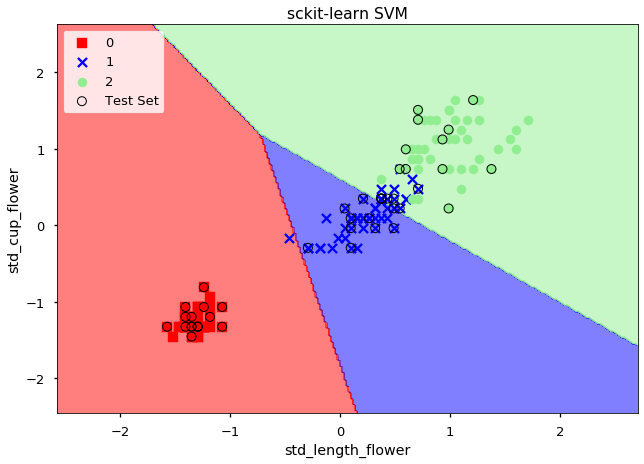

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
from matplotlib import style
from plotdregion import plot_decision_region
from sklearn.linear_model import LogisticRegression

style.use('seaborn-talk')

if __name__ == '__main__':
    iris = datasets.load_iris()
    X = iris.data[:,[2,3]]
    y = iris.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    sc = StandardScaler()
    sc.fit(X_train) # X_train의 평균과 표준편차를 구함
    X_train_std = sc.transform(X_train) # 트레이닝 데이터를 표준화
    X_test_std = sc.transform(X_test) # 테스트 데이터를 표준화
    
    # 여기 부분만 바꿔주면서 확인하면 된다.
    #ml = Perceptron(eta0=0.01, max_iter=40, random_state=0)
    #ml = LogisticRegression(C=1000.0, random_state=0)
    #ml = SVC(kernel='linear', C=1.0, random_state=0)
    ml = SGDClassifier(loss='perceptron') # 확률적 경사하강법 적용 퍼셉트론
    #ml = SGDClassifier(loss='log') # 확률적 경사하강법 적용 로지스틱 회귀
    #ml = SGDClassifier(loss='hinge') # 확률적 경사하강법 적용 SVM
    
    
    ml.fit(X_train_std, y_train)
    y_pred = ml.predict(X_test_std)
    print('Total test number : %d, Number of Error : %d' %(len(y_test), (y_test != y_pred).sum()))
    print('Accuracy': %.2f' %accuracy_score(y_test, y_pred))
    
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_region(X=X_combined_std, y=y_combined, classifier=ml, test_idx=range(105,150), title='sckit-learn SVM')